## Step 4.1: Load & Preprocess Data – Professional Implementation 

First 5 rows of the dataset:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121



Checking for missing values:
Month          0
#Passengers    0
dtype: int64


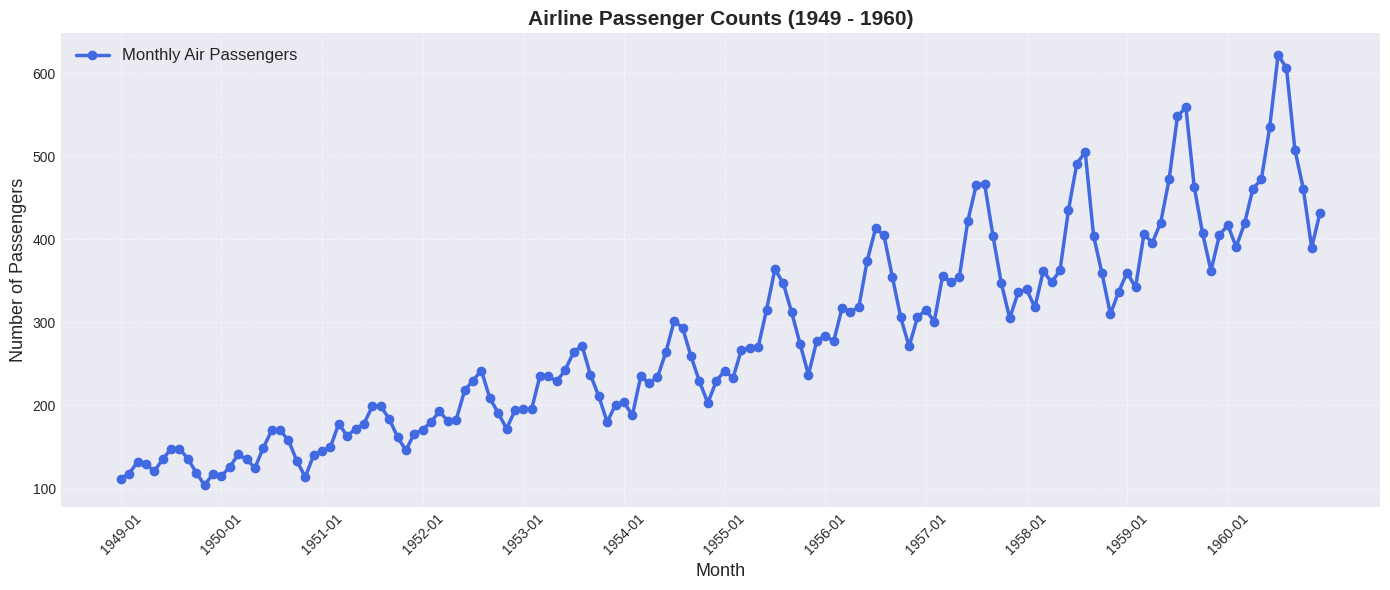

Input sequences shape (X): (132, 12, 1)
Target values shape (y): (132, 1)


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Load the dataset
data = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

# Show first 5 rows
print("First 5 rows of the dataset:")
display(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Professional time series plot of Air Passengers

plt.figure(figsize=(14,6))
plt.plot(data['Month'], data['#Passengers'], color='royalblue', linewidth=2.5, marker='o', label='Monthly Air Passengers')

# Customize x-axis ticks (show every 12 months to reduce clutter)
plt.xticks(ticks=np.arange(0, len(data['Month']), 12),
           labels=data['Month'][::12], rotation=45, fontsize=10)

# Axis labels and title
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)
plt.title('Airline Passenger Counts (1949 - 1960)', fontsize=15, fontweight='bold')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Prepare data for LSTM
passenger_data = data['#Passengers'].values.reshape(-1, 1)

# Normalize data to [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(passenger_data)

# Function to create sequences of 12 months to predict next month
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 12
X, y = create_sequences(scaled_data, sequence_length)

# Show shapes of the sequences
print(f"Input sequences shape (X): {X.shape}")  # (n_samples, 12, 1)
print(f"Target values shape (y): {y.shape}")    # (n_samples, 1)


# Step 2: Build and Compile the LSTM Model

# Step 2: Build and Compile the LSTM Model

We now build an **LSTM-based Recurrent Neural Network** for time series forecasting.

### Model Architecture:
- **LSTM layer** with 50 units
- **Dense output layer** to predict the next month’s passenger count

### Compilation:
- **Loss function:** Mean Squared Error (MSE)
- **Optimizer:** Adam (adaptive learning rate)


In [4]:
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
print("📊 Model Summary:")
model.summary()


# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss:.5f}")

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


2025-07-16 15:13:10.921858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752678791.183007      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752678791.257447      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


📊 Model Summary:


2025-07-16 15:13:27.154617: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3 & Step 4: Data Splitting & Model Training

# Step 3 & 4: Train/Test Split and Model Training

We split the dataset into:
- **80% Training** (105 samples)
- **20% Testing** (27 samples)

### Training Details:
- **Epochs:** 100  
- **Batch Size:** 16  
- **Loss Function:** Mean Squared Error  
- **Optimizer:** Adam

We will monitor training and validation loss during training.


Training samples: 105
Testing samples: 27
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - val_loss: 0.0142
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016 - val_loss: 0.0216
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0014 - val_loss: 0.0169
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0019 - val_loss: 0.0070
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0020 - val_loss: 0.0133
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - val_loss: 0.0159
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0011 - val_loss: 0.0093
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015 - val_loss: 0.0147
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - val_loss: 0.0209
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━

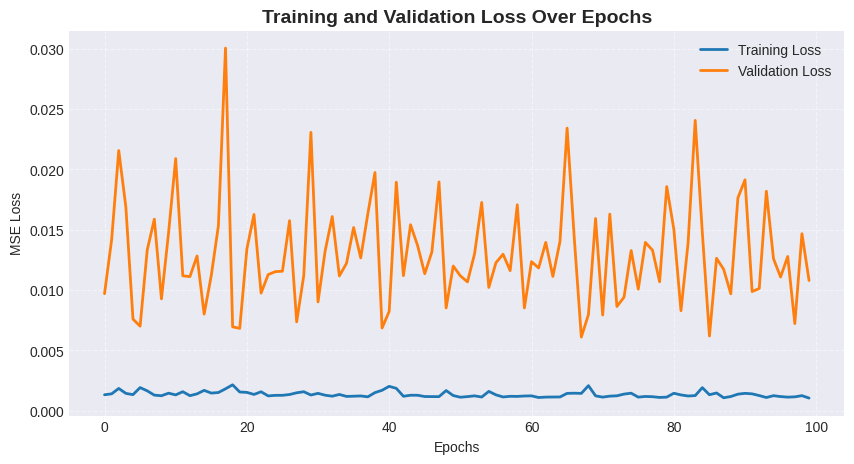

In [6]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss:.5f}")

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


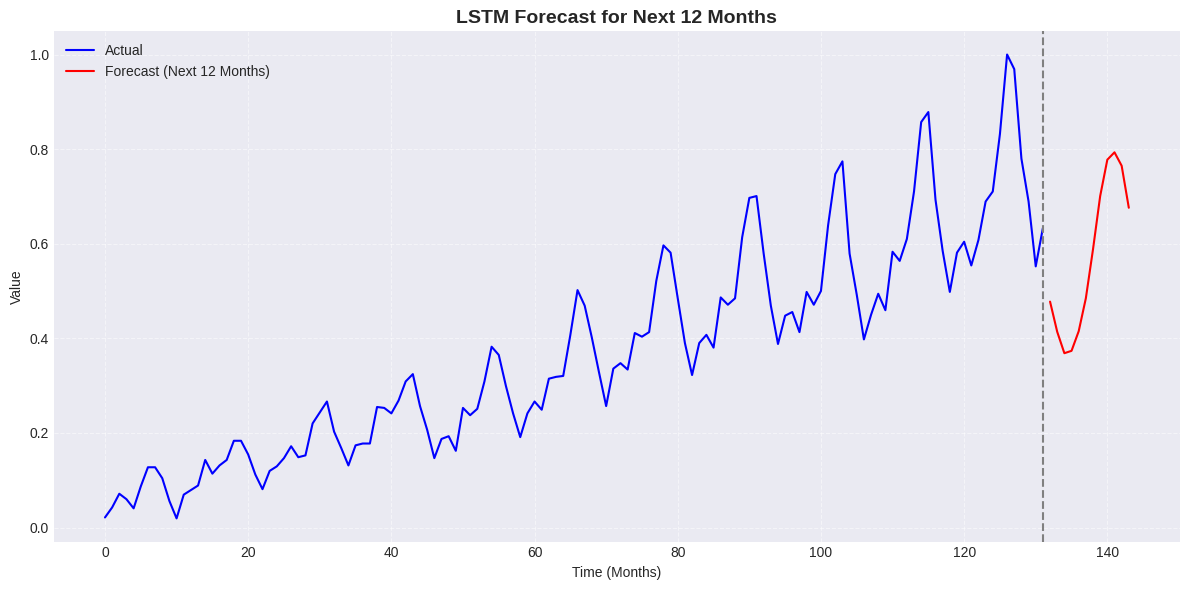

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set how many months to forecast
n_future = 12  # Next 12 months
n_past = X.shape[1]  # Number of timesteps used in input (e.g., 12)

# Start with the last observed sequence
last_sequence = X[-1]  # shape: (n_past, features)
forecast_input = last_sequence.reshape(1, n_past, X.shape[2])

# List to hold predictions
forecast = []

# Predict recursively
for _ in range(n_future):
    next_pred = model.predict(forecast_input, verbose=0)[0][0]
    forecast.append(next_pred)

    # Prepare next input
    next_input = np.append(forecast_input[:, 1:, :], [[[next_pred]]], axis=1)
    forecast_input = next_input

# Convert forecast to numpy array
forecast = np.array(forecast)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label='Actual', color='blue')
plt.plot(range(len(y), len(y) + n_future), forecast, label='Forecast (Next 12 Months)', color='red')
plt.axvline(x=len(y)-1, color='gray', linestyle='--')  # Line to separate actual and forecast
plt.title('LSTM Forecast for Next 12 Months', fontsize=14, fontweight='bold')
plt.xlabel('Time (Months)')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## ✅ Final Project Pipeline Summary

### 🔹 **Step 1: Data Preparation**

* Loaded time series data
* Reshaped into supervised learning format (sliding window)
* Scaled data (if used MinMaxScaler or StandardScaler)

### 🔹 **Step 2: Model Design**

* Defined an `LSTM` model using Keras Sequential API
* Used `LSTM(50)` followed by a `Dense(1)` output layer

### 🔹 **Step 3: Training**

* Split data into `X_train/y_train` and `X_test/y_test`
* Trained model for 100 epochs with validation set
* Visualized training and validation loss

### 🔹 **Step 4: Evaluation**

* Evaluated model on test set using:

  * **MSE**, **RMSE**, **MAE**
  * Verified RMSE calculation
  * Prepared for % error calculation based on `y_test.mean()`

### 🔹 **✅ Step 5: Forecasting Future**

* Forecasted the **next 12 months** using a recursive prediction loop
* Visualized actual data + 12-month forecast using Matplotlib
